In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

## LOAD DATA

In [2]:
continent_season = pd.read_csv("data/continent_season.csv", encoding="latin1")
continent_season

,Country,Continent,Hemisphere,Month,Season
0,Usa,North America,North,6,Summer
1,Usa,North America,North,6,Summer
2,Usa,North America,North,6,Summer
3,Australia,Oceania,South,6,Winter
4,Mexico,North America,North,6,Summer
...,...,...,...,...,...
4729,Jamaica,North America,North,12,Winter
4730,Martinique,North America,North,3,Spring
4731,Usa,North America,North,8,Summer
4732,Usa,North America,North,7,Summer


In [3]:
pd.isnull(continent_season).sum()

Country       0
Continent     0
Hemisphere    0
Month         0
Season        0
dtype: int64

In [4]:
type_shark = pd.read_csv("data/continent_season_type-shark.csv", encoding="latin1")

In [5]:
pd.isnull(type_shark).sum()

Country       0
Continent     0
Month         0
Year          0
Season        0
Type Shark    0
dtype: int64

## DISPLAYING SETTINGS

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [7]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## HYPOTHESIS

In [8]:
continent_season.groupby("Continent").agg("count")

,Country,Hemisphere,Month,Season
Continent,,,,
Africa,651,651,651,651
Asia,218,218,218,218
Europe,129,129,129,129
North America,2187,2187,2187,2187
Oceania,1402,1402,1402,1402
South America,147,147,147,147


### Hipothesis 1: Sharks attack equally in the northern hemisphere and in the southern hemisphere.

In [9]:
!ls images

attacks_by_continent.png  df_final.png              hip2.png
attacks_by_hemisphere.png df_initial.png            hip3.png
attacks_by_season.png     hip1.png


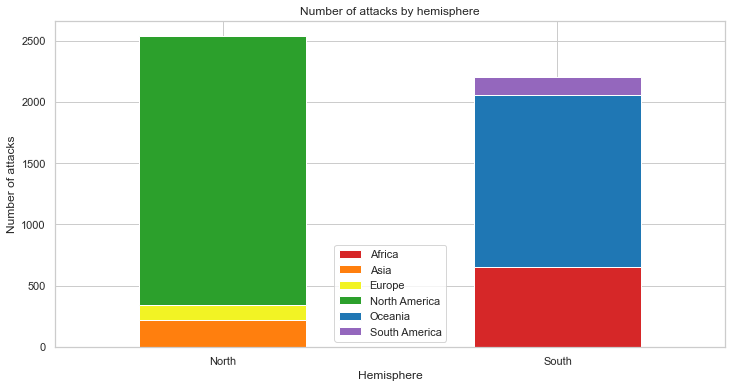

In [10]:
colors = { 'Asia': '#ff7f0e','Africa': '#d62728', 'Europe': '#f2f324', 'North America': '#2ca02c', 'South America': '#9467bd', 'Oceania': '#1f77b4'}

# Group the data by hemisphere and continent, and count the number of occurrences
df_1 = continent_season.groupby(['Hemisphere', 'Continent']).size().unstack()

# Plot the data with stacked bar chart and color by continent
hip_1 = df_1.plot(kind='bar', stacked=True, title="Number of attacks by hemisphere", color=colors)

# Set the x and y axis labels and rotation
plt.xticks(rotation=0.5)
plt.yticks(rotation=0.5)
plt.ylabel("Number of attacks");

plt.legend()
plt.show()

#hip_1.figure.savefig('images/attacks_by_hemisphere.png', dpi=600)

### Hipothesis 2: Australia is the continent with the highest number of shark attacks.

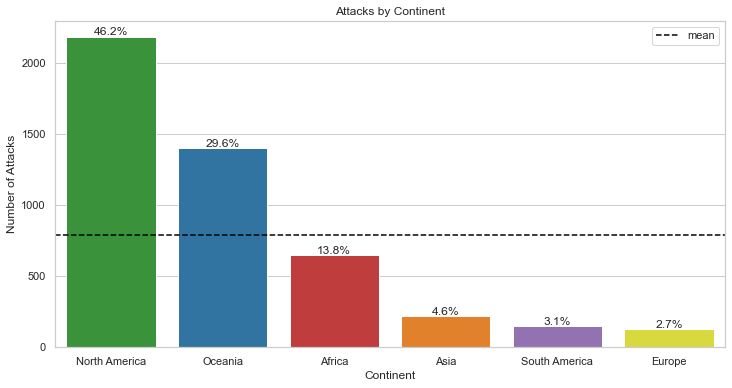

In [11]:
# COUNTPLOT
hip_2 = sns.countplot(x=continent_season["Continent"],
                      palette = ["#2ca02c", "#1f77b4", "#d62728", "#ff7f0e", "#9467bd", "#f2f324"], 
                      order = continent_season["Continent"].value_counts().index);

#TITLES
hip_2.set_xlabel("Continent")
hip_2.set_ylabel("Number of Attacks")
hip_2.set_title("Attacks by Continent")

#MEDIAN
    # Calculate the median of the values of continents
median_continents = continent_season["Continent"].value_counts().mean()
    # Add an horizontal bar for the median
hip_2.axhline(y=median_continents, color="black",label="mean", linestyle="dashed")

#PERCENTAGE
    # Display the % that represents each Continent
total = float(len(continent_season))
for bar in hip_2.patches:
    # Obtain the height of the bar
    height = bar.get_height()
    # Calculate the percentage corresponding to the bar height
    percent = '{:.1%}'.format(height/total)
    # Calculate the position of the center of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = height + 10
    
    hip_2.annotate(percent, (x, y), ha='center')

    
plt.legend()

plt.show()

#hip_2.figure.savefig('images/attacks_by_continent.png', dpi=600)

### Hipothesis 3: In summer there are more shark attacks.

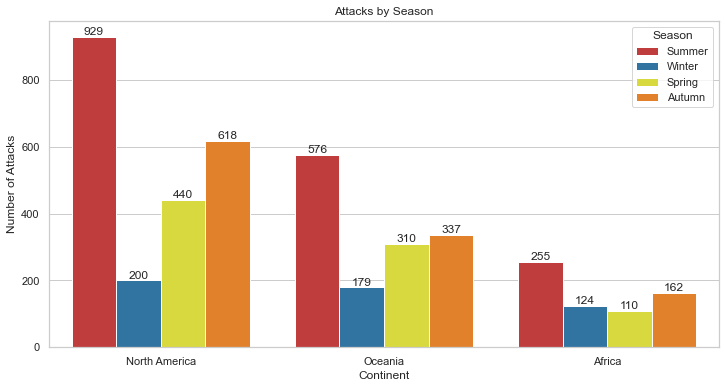

In [12]:
# SORT continents
continent_order = ['North America','Oceania', 'Africa']
df_filter_1 = continent_season.loc[continent_season['Continent'].isin(continent_order)]

# COUNTPLOT
hip_3 = sns.countplot(x=continent_season["Continent"], 
                      hue=continent_season["Season"],
                      data=df_filter_1, 
                      palette = ["#d62728", "#1f77b4", "#f2f324", "#ff7f0e"], 
                      order=continent_order);


#TITLES
hip_3.set_xlabel("Continent")
hip_3.set_ylabel("Number of Attacks")
hip_3.set_title("Attacks by Season")

# Add the number of attacks on top of each bar
for bar in hip_3.patches:
    height = bar.get_height()
    hip_3.annotate('{:.0f}'.format(height), xy=(bar.get_x()+bar.get_width()/2., height), 
                   xytext=(0, 5), textcoords='offset points', ha='center', va='center')

plt.show()
#hip_3.figure.savefig('images/attacks_by_season.png', dpi=600)

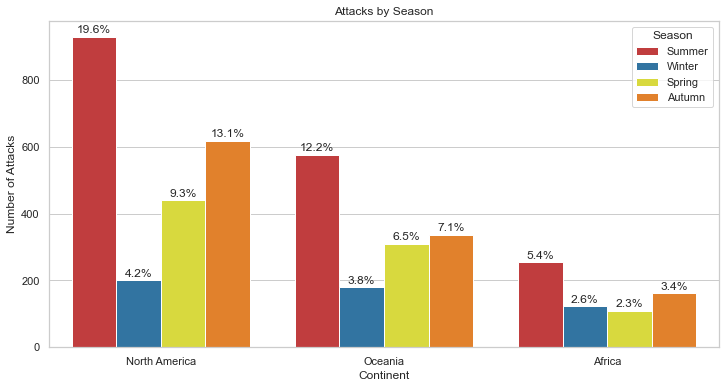

In [13]:
# SORT continents
#continent_order = ['North America','Oceania', 'Africa']
df_filter_1 = continent_season.loc[continent_season['Continent'].isin(continent_order)]

# COUNTPLOT
hip_4 = sns.countplot(x=continent_season["Continent"], 
                      hue=continent_season["Season"],
                      data=df_filter_1, 
                      palette = ["#d62728", "#1f77b4", "#f2f324", "#ff7f0e"], 
                      order=continent_order);

#TITLES
hip_4.set_xlabel("Continent")
hip_4.set_ylabel("Number of Attacks")
hip_4.set_title("Attacks by Season")


#PERCENTAGE
total = float(len(continent_season))
for bar in hip_4.patches:
    # Obtain the height of the bar
    height = bar.get_height()
    # Calculate the percentage corresponding to the bar height
    percent = '{:.1%}'.format(height/total)
    # Calculate the position of the center of the bar
    x = bar.get_x() + bar.get_width() / 2
    y = height + 10
    
    hip_4.annotate(percent, (x, y), ha='center')

plt.show()

#hip_4.figure.savefig('src/attacks_by_season_perc.png', dpi=600)

In [14]:
pd.DataFrame(continent_season.groupby(["Hemisphere","Continent", "Season"])["Season"].count())

Season
Hemisphere Continent     Season        
North      Asia          Autumn      46
                         Spring      54
                         Summer      87
                         Winter      31
           Europe        Autumn      31
                         Spring      11
                         Summer      79
                         Winter       8
           North America Autumn     618
                         Spring     440
                         Summer     929
                         Winter     200
South      Africa        Autumn     162
                         Spring     110
                         Summer     255
                         Winter     124
           Oceania       Autumn     337
                         Spring     310
                         Summer     576
                         Winter     179
           South America Autumn      42
                         Spring      31
                         Summer      41
                         Winter      33

In [15]:
pd.DataFrame(continent_season.groupby(["Season", "Continent"])["Continent"].count())

Continent
Season Continent               
Autumn Africa               162
       Asia                  46
       Europe                31
       North America        618
       Oceania              337
       South America         42
Spring Africa               110
       Asia                  54
       Europe                11
       North America        440
       Oceania              310
       South America         31
Summer Africa               255
       Asia                  87
       Europe                79
       North America        929
       Oceania              576
       South America         41
Winter Africa               124
       Asia                  31
       Europe                 8
       North America        200
       Oceania              179
       South America         33

## DRAFT

In [16]:
type_shark.groupby("Type Shark").agg("count")

,Country,Continent,Month,Year,Season
Type Shark,,,,,
Blacktip,21,21,21,21,21
Bull,65,65,65,65,65
Mako,26,26,26,26,26
Tiger,107,107,107,107,107
White Shark,373,373,373,373,373


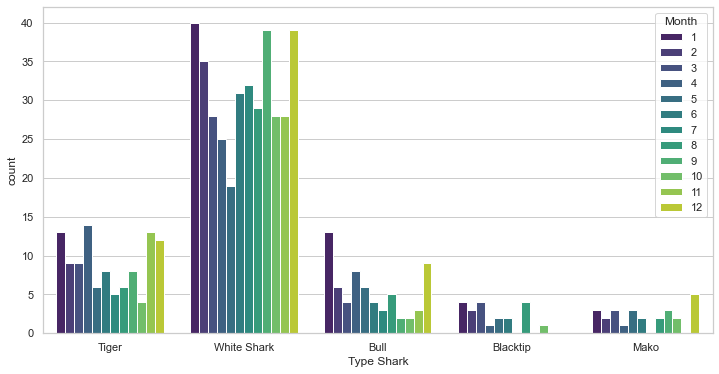

In [17]:
 sns.countplot(x=type_shark["Type Shark"], hue=type_shark["Month"], palette="viridis");

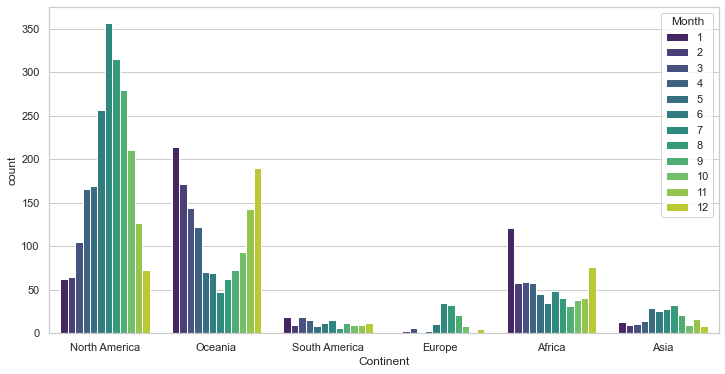

In [18]:
sns.countplot(x=continent_season["Continent"], hue=continent_season["Month"], palette="viridis");

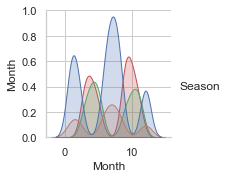

In [19]:
sns.pairplot(continent_season, hue="Season");

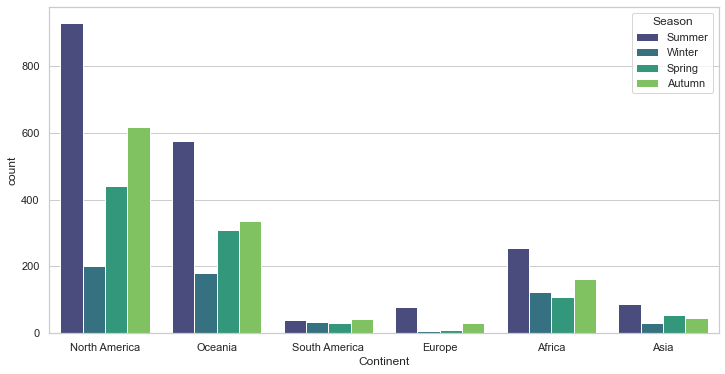

In [20]:
hip_3 = sns.countplot(x=continent_season["Continent"], hue=continent_season["Season"], palette="viridis");


plt.show()
